<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EC%97%B0%EA%B4%80%EC%84%B1%EB%B6%84%EC%84%9D_%ED%95%98%EB%8A%94%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3. arulesViz 패키지에 있는 Groceries 데이터 셋을 활용하여 연관성 분석을 실시하시오

### 4. (연관성분석) lotto 데이터를 활용하여 아래를 해결하시오
### 4-1. 연관규칙분석을 수행하기 위해 데이터셋을 transaction 데이터로 변환하시오 그리고, 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하시오

### 4-2. 변환 데이테에 대해 apriori 함수를 사용하여 연관규칙을 생성하시오. (최소지지도 ; 0.002, 최소신뢰도 : 0.8, 초대조합 항목 수 :6개)

### 4-3. 도출된 연관규칙들을 향상도 기준으로 내림차순하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 CSV파일로 출력하시오

In [ ]:
교수님 ,, 어렵습니다 ,, 


> # 목차

### **1. 장바구니 분석(연관성 알고리즘)`arules`, `arulesViz`::<BR>**
###### ✅알고리즘: apriori, ECLAT
###### 1-1. 데이터 준비
###### 1-2. 모델링
###### 1-3. 평가

### **2. 추천 엔진`recommender lab`::**
#### 2-1. 사용자 기반 협업 필터링(User-based collaborative filering, UBCF)
###### ✅알고리즘: KNN, 유사성 측정값(피어슨 상관계수, 코사인 유사도)
#### 2-2. 아이템 기반 협업 필터링(Item-based collaborative filtering, IBCF)<BR>
######  ✅알고리즘:유사성 측정값(피어슨 상관계수, 코사인 유사도)<BR>
#### 2-3. 특이값 분해(SVD)와 주성분 분석(PCA)
### **3. 순차적 분석기법 `TraMineR`::<br>**
###### ✅알고리즘: 전이조합, 비유사도 행렬

### **1. 장바구니 분석**<br>
1) 최적 상품이나 서비스 조합 찾아내서 ⏩ 마케팅 <br>
2) 사기검출(fraud detection), 의료서비스<br>
3) if ~ then<br>
4) 아이템 세트(item set): 데이터 세트 안에서 1개 이상의 물품의 집합<br>
5) 지지도(support)
- 관심 있는 아이템 세트를 포함하는 데이터 거래의 비율<br>
- 좋은 규칙(빈도가 많은, 구성비가 높은)을 찾거나, 불필요한 연산을 줄일 때(pruning, 가지치기)의 기준

6) 신뢰도(confidence): 누가 x를 샀을 때, y를 사는 조건부 확률 `P(Y|X)`
  - X: 선행사건(antecedent), 좌변(LHS)
  - Y: 결과(cosequence), 우변(RHS)

7) 향상도(lift): 
- X,Y가 함께 일어난 지지도 / X,Y독립가정, 동시에 일어날 수 있는 확률{(X의 마지널)*(Y의 마지널) }<br>

8) ✅알고리즘
- apriori: 어떤 아이템 세트가 자주 나타나면 ⏩ 모든 부분 집합 또한 자주 나타남
  - 최소 빈도(지지도) 설정 *k=l* 
  - 지정된 지지도보다 같거나 더 긴 길이의 아이템 셋 만듦
  - *k+1* 부터 *k+n*까지 반복 ⏩ 지지도보다 낮은 아이템 셋 제거
  - 새로운 아이템 셋 발견되지 않을 때까지 반복


###### **1-1. 데이터 준비**

In [2]:
#패키지설치
install.packages("arules"); library(arules)
install.packages("arulesViz"); library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [4]:
#데이터 로드
data(Groceries)
gr<-Groceries
#간단 구조 확인
head(gr)
str(gr)

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


1. transaction 클래스 즉, 희소 행렬 오브젝트(sparse matrix object)
2. #as(df, "transantions")

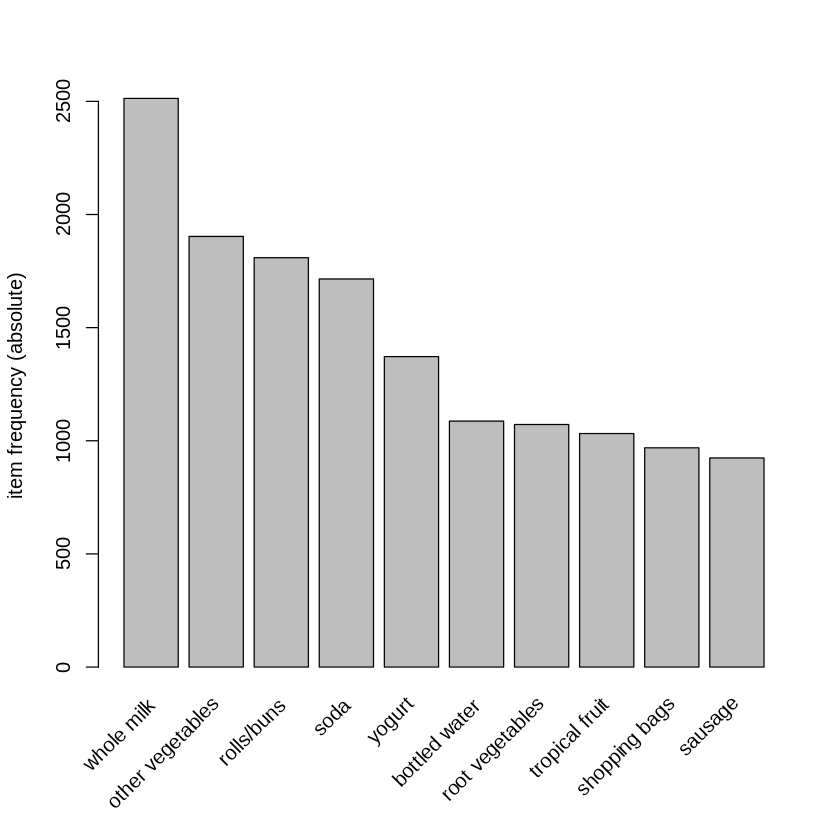

In [6]:
#데이터탐색
itemFrequencyPlot( gr, topN=10, type="absolute")

* 가장 자주 팔림 품목: whole milk

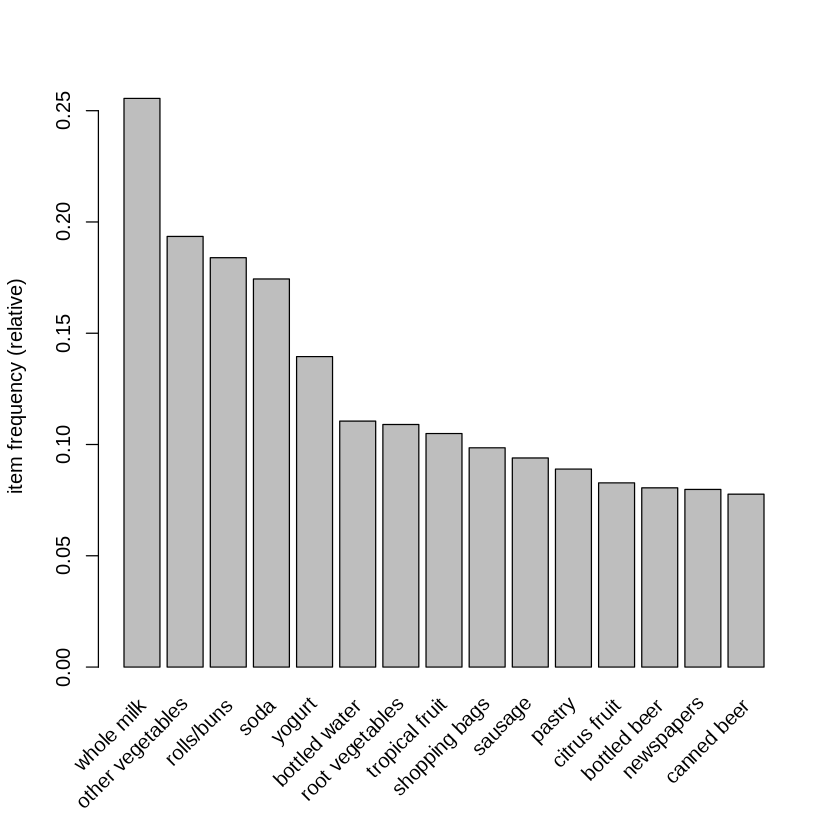

In [7]:
#상대빈도
itemFrequencyPlot(gr, topN=15)

- 맥주는 13, 15번째로 많이 팔림
-10% 미만의 소비자가 병맥주와 캔맥주를 구매함

###### **1-2. 모델링**

[ref1.추천화시스템-03연관분석(Association Analysis)알고리즘](https://velog.io/@redgem92/%EC%B6%94%EC%B2%9C%ED%99%94-%EC%8B%9C%EC%8A%A4%ED%85%9C-03.-%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9DAssociation-Analysis-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)<BR>
[ref2. recommendation_system
](https://github.com/pray92/recommendation_system) <br>
ref3. R로 마스터하는 머신러닝. 코리 레스마이스터. p337-382<br>
[ref4.지지도](https://rfriend.tistory.com/191)